In [9]:
using Plots

#parameters
x_delta = 0.1
t_delta = 0.1 
tend = 2.0
xend = 2.0

#number of points
nx = Int64(ceil(xend/x_delta))
nt = Int64(ceil(tend/t_delta))

#solution matrix
mat = zeros(nt, nx)

#initial condition
mat[1, :] .= 1.0
mat[1, 1] = 10.0

#
function next_state(i, j, mat)
    coefs = [-1.8438, 1, 0.25]./(-0.5)
    neighbohrs = [mat[i, j], mat[i-1, j], mat[j, i-1]]

    return sum(coefs.*neighbohrs)
end

function next_state_boundary(i, j, mat)
    return 0
end

next_state_boundary (generic function with 1 method)

Este solo sirve si la ecuación es parabólica

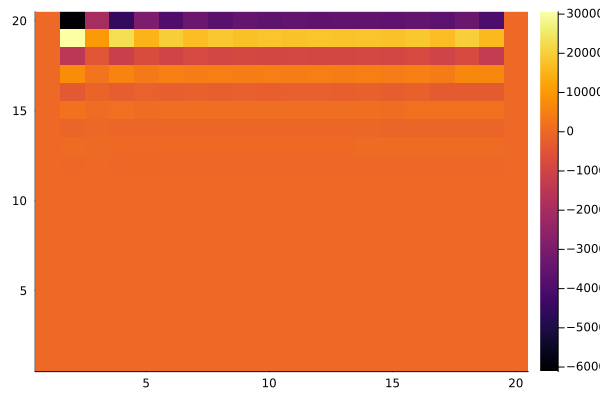

In [10]:
#main loop
#time loop
for i in 2:nt

    #space loop
    for j in 2:nx-1
        mat[i, j+1] = next_state(i, j, mat)
    end
    
    #boundary conditions applied
    mat[i, nx] = next_state_boundary(i, nx, mat)
end

heatmap(mat)